In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [364]:
# read the dataset
bank_data = pd.read_csv("bank_marketing_part1_Data.csv")
bank_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### Data Inspection

In [365]:
# basics of the Bank data
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Check for missing values in the dataset.

In [366]:
bank_data.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [367]:
bank_data.shape

(210, 7)

In [368]:
bank_data.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


Data is not scaled and we need to scale the data

### Data Cleaning

In [369]:
bank_data.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

No NULL values are observed.

In [370]:
#Checking if any columns having unique value ie only 1 value
unique =bank_data.nunique()
unique = unique[unique.values ==1]
unique

Series([], dtype: int64)

No unique value

### Checking for Duplicates

In [371]:
bank_data.duplicated().sum()

0

## 1. Perform exploratory data analysis. Describe the data briefly.

## EDA

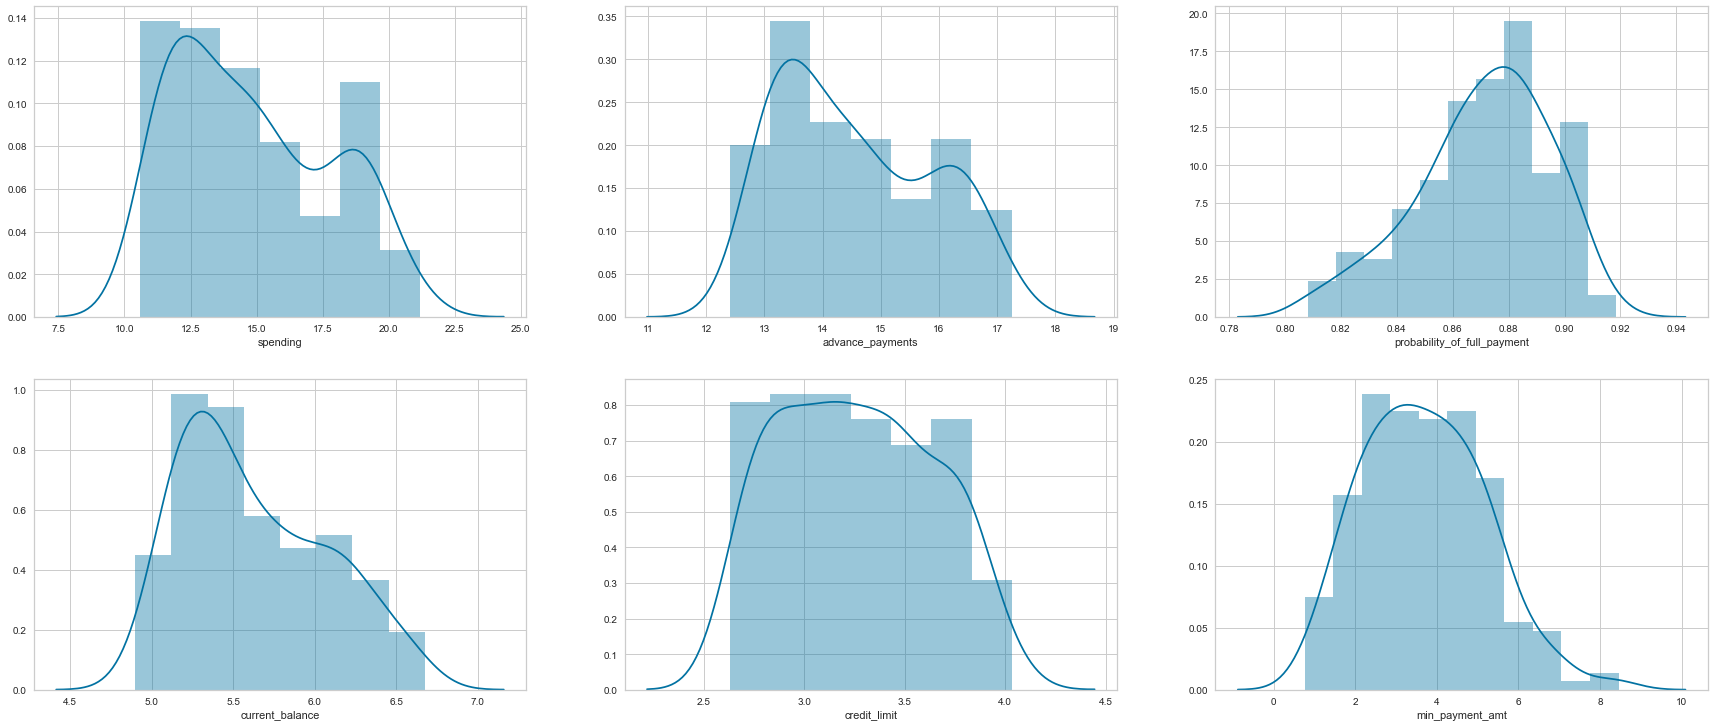

In [372]:
plt.figure(figsize = (30,40))
feature = bank_data.columns[:-1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.distplot(bank_data[i[1]])

From the above Frequency plot, we can say that there is skewness present in the bank dataset in which we can clearly see that positive skewness present in spending, advance_payments.and negative skewness present in probability_of_full_payment. min_payment_limit and credit_limit variables are seeming to be normally distributed.

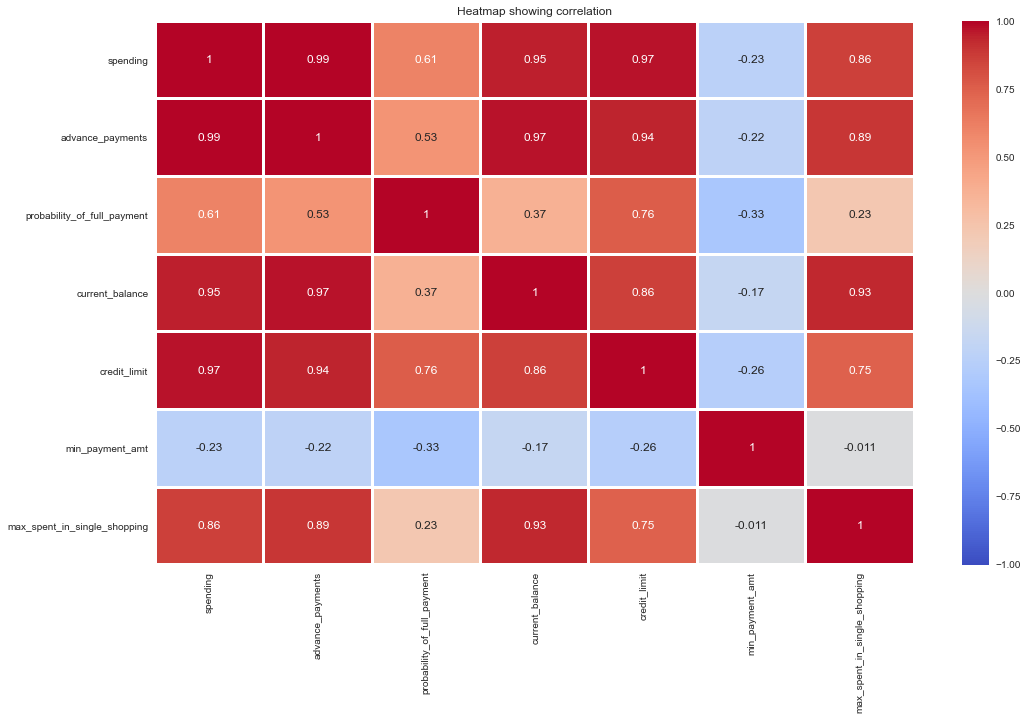

In [373]:
plt.figure(figsize=(17,10));
sns.heatmap(bank_data.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm', lw=2);
plt.title('Heatmap showing correlation');

1) From Heatmap plot, we can clearly see that our dataset contains multi co-linear pairs that is presence of strong relationship between independent variables which can lead to effect the accuracy of the model. In our data variable spending has strong significant relationship with advance_payments, credit_limit, current_balance and vice versa. Also, advance_payments variable has strong relationship with current_balance variable, current_balance feature has strong relationship with max_spent_in_single_shopping.

2) From the above Pair plot, we conclude that there is linear relationship present between variables.So, clearly, we can see that there is presence of multi co-linearity in our dataset.

In [374]:
# Heatmap to understand the attributes dependency

# Let us draw heatmap to understand the corelation better.
#plt.figure(figsize = (10,10))  
#sns.heatmap(bank_data.corr(),annot = True,cmap="YlGnBu")

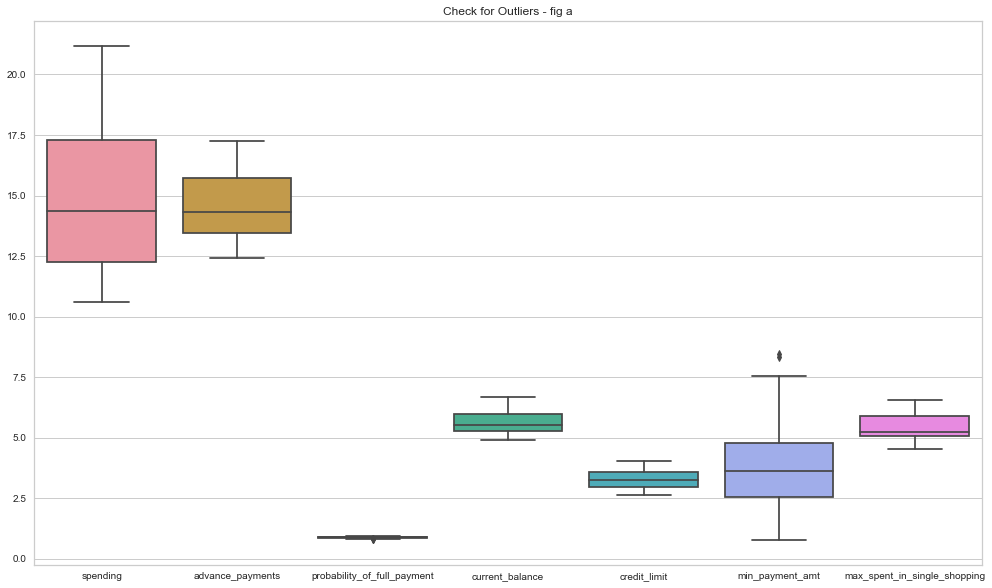

In [375]:
# Checking for outliers 
plt.figure(figsize=(17,10));
sns.boxplot(data=bank_data);
plt.title('Check for Outliers - fig a');

From the above figure, we can state that outliers are present in the bank dataset and the variables which are prone to outliers are/is min_payment_amt

In [376]:
#q1 = bank_data['min_payment_amt'].quantile(0.25)
#q3 = bank_data['min_payment_amt'].quantile(0.75)
#iqr = q3 - q1
#bank_data = bank_data[(bank_data['min_payment_amt'] >= q1-1.5*iqr) & (bank_data['min_payment_amt'] <= q3+1.5*iqr)]
#bank_data.shape # To find out the number of rows and column after outlier treatment

In [377]:
#sns.boxplot(x=bank_data['min_payment_amt'])
#plt.show()

In [378]:
print('The number of rows of the dataframe is',bank_data.shape[0],'.')

print('The number of columns of the dataframe is',bank_data.shape[1],'.')

The number of rows of the dataframe is 210 .
The number of columns of the dataframe is 7 .


## 2. Why scaling is necessary for clustering in this case? Justify

Scaling is needed , becasue if we dont scale the date and if we take such coloumns that are not scaled we
may get the resultls that are highliy influenced by the coloumns that has higher magnitude of information.

For data that is of different physical measurements or units, its probably a good idea to scale and center. 
For example, when clustering credit limit the data may contain attributes such as spendings,probability of full payment, currenct balance, etc. In this case it may be a better idea to scale and center since we are unsure of the relationship between each attribute. The intuition behind that is that since many clustering algorithms require some definition of distance, if we do not scale and center our data, we may give attributes which have larger magnitudes more importance. In the context of our problem, I would scale and center the data if it contains attributes like spending, credit limit, current balance etc.


In [379]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [380]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(bank_data)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

## 3. Perform hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

# Creating the Dendrogram
### Importing dendrogram and linkage module

In [381]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [382]:
wardlink = linkage(scaled_df, method = 'ward')

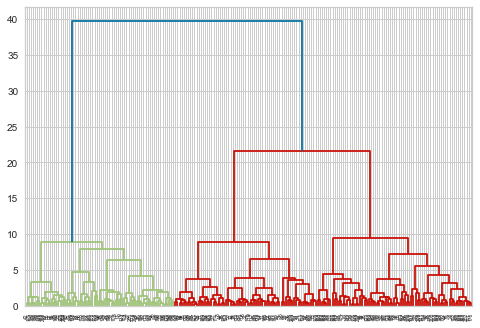

In [383]:
dend = dendrogram(wardlink)

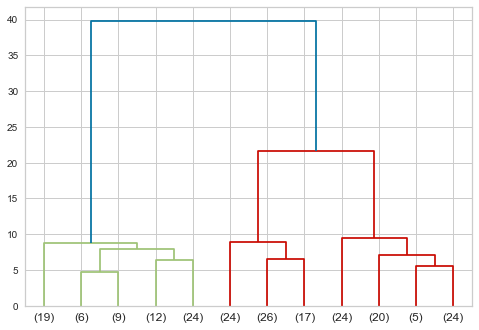

In [384]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 12,
                 )

- There are 2 clusters red and green and we can see the 2 vertical lines covering both the clusters , therefore the optimum number of clusters would be 2.
- Green cluster has minimum number of transactions where as orange cluster has comparetively large number of transactions

# Importing fcluster module to create clusters

In [385]:
from scipy.cluster.hierarchy import fcluster

In [386]:
#Method 1

clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [387]:
# Method 2

clusters = fcluster(wardlink, 24, criterion='distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [388]:
bank_data['clusters'] = clusters

In [389]:
bank_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


### Cluster Frequency

In [390]:
bank_data.clusters.value_counts().sort_index()

1     70
2    140
Name: clusters, dtype: int64

# Cluster Profiles

In [391]:
#aggdata=bank_data.iloc[:,0:8].groupby('clusters').mean()
aggdata=bank_data.groupby('clusters').mean()
aggdata['Freq']=bank_data.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.085571,13.766214,0.864298,5.363714,3.045593,3.730723,5.103421,140


- Cluster 1: Customer has better profile with repsect to speding and credit limit, they are premium customers
- Cluster 2: Customers have lower credit limit and less spending limit and they are less spenders
- Cluster 1 has lesser customers in comparision to clsuter 2, which means bank can come up with some offers for cluster 2   customers so that they can spend more or spend atleast close to what cluster 1 customer has been spending. 
- Credit card with more lucerative incentives can help to attracct cluster 2 customers
- It can be seen that cluster 2 customers has less probability of full payment in comparision to cluster 1, bank could identify the reasons to improve the probabiltiy in both the cases.



In [392]:
#bank_data.to_csv('bank_new.csv')

## 4. Perform K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

# Using K Means Clustering

## Removing outliers

K-means can be quite sensitive to outliers.

In [393]:
def remove_outliers(data):
    Q1,Q3=np.percentile(data,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [394]:
columns = [i for i in bank_data.columns[1:]]
for i in columns:
    ll, ul = remove_outliers(bank_data[i])
    bank_data[i]=np.where(bank_data[i]>ul, ul, bank_data[i])
    bank_data[i]=np.where(bank_data[i]<ll, ll, bank_data[i])

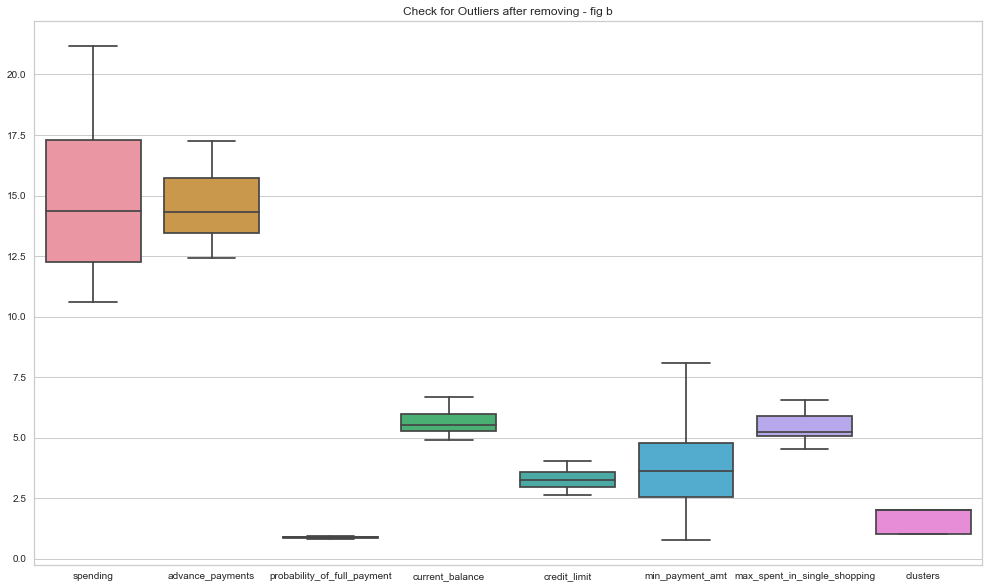

In [395]:
plt.figure(figsize=(17,10));
sns.boxplot(data=bank_data);
plt.title('Check for Outliers after removing - fig b');

# Creating Clusters using KMeans

In [396]:
k_means = KMeans(n_clusters = 2,verbose=1)

In [397]:
k_means.fit(scaled_df)

Initialization complete
Iteration 0, inertia 845.5994108190129
Iteration 1, inertia 659.171754487041
Converged at iteration 1: center shift 0.0 within tolerance 9.999999999999999e-05
Initialization complete
Iteration 0, inertia 1029.633782825897
Iteration 1, inertia 681.815387213617
Iteration 2, inertia 665.3179220658277
Iteration 3, inertia 662.4887522031312
Iteration 4, inertia 662.0393605297505
Iteration 5, inertia 660.7568648121209
Iteration 6, inertia 660.0567034740023
Iteration 7, inertia 659.9357766443566
Converged at iteration 7: center shift 0.0 within tolerance 9.999999999999999e-05
Initialization complete
Iteration 0, inertia 1332.009136044505
Iteration 1, inertia 676.2135680236668
Iteration 2, inertia 662.8326692843024
Iteration 3, inertia 659.3788710294709
Iteration 4, inertia 659.171754487041
Converged at iteration 4: center shift 0.0 within tolerance 9.999999999999999e-05
Initialization complete
Iteration 0, inertia 1103.8549797160758
Iteration 1, inertia 762.39940268703

KMeans(n_clusters=2, verbose=1)

In [398]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [399]:
k_means.inertia_

659.171754487041

In [400]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [401]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

371.30172127754196

In [402]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

In [403]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

327.3281094192775

In [404]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

290.6487044856193

WSS reduces as K keeps increasing

In [405]:
wss =[] 

In [406]:
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [407]:
wss

[659.171754487041,
 430.6589731513006,
 371.65314399951626,
 326.5136953844313,
 289.46717056412893,
 262.4508608641794,
 239.09777495279283,
 223.10976574718265,
 204.89898109036415]

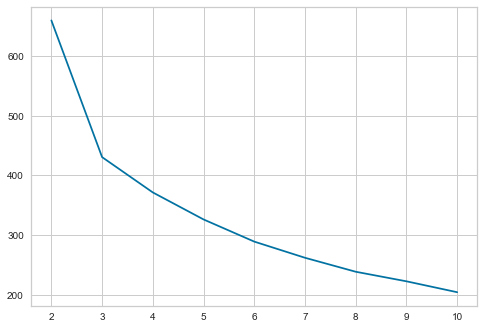

In [408]:
plt.plot(range(2,11), wss);

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we can see that WCSS doesn't decrease significantly after 3 so the optimum number of clusters would be 3.

In [409]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
labels = k_means.labels_

In [410]:
silhouette_score(scaled_df,labels)

0.32757426605518075

In [411]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [412]:
silhouette_score(scaled_df,labels)

0.4007270552751299

In [413]:
bank_data["Clus_kmeans"] = labels
bank_data.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1.0,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2.0,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1.0,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2.0,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1.0,1


In [414]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [415]:
silhouette_score(scaled_df,labels)

0.4007270552751299

In [416]:
sil_width = silhouette_samples(scaled_df,labels)

In [417]:
bank_data["sil_width"] = sil_width
bank_data.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1.0,1,0.573699
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2.0,2,0.366386
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1.0,1,0.637784
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2.0,0,0.512458
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1.0,1,0.362276


In [418]:
silhouette_samples(scaled_df,labels).min()

0.002713089347678533

# Cluster Profiling

In [420]:
bank_data.Clus_kmeans.value_counts().sort_index()

0    72
1    67
2    71
Name: Clus_kmeans, dtype: int64

In [422]:
clust_profile=bank_data.drop(['clusters'], axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['Freq']=bank_data.Clus_kmeans.value_counts().sort_index()
clust_profile'tr;t

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Freq
Clus_kmeans,,,,,,,,,
0,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,0.397473,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468772,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.339816,71


In [423]:
bank_data.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Clus_kmeans', 'sil_width'],
      dtype='object')

In [424]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [425]:
scaled_df_new = pd.DataFrame(scaled_df,columns = ['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance',
       'credit_limit','min_payment_amt','max_spent_in_single_shopping'])

In [426]:
scaled_df_new

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [429]:
# Centerioid for each and every cluster;
k_means.cluster_centers_

array([[-1.03025257, -1.00664879, -0.9649051 , -0.89768501, -1.08558344,
         0.69480448, -0.62480856],
       [ 1.25668163,  1.26196622,  0.56046437,  1.23788278,  1.16485187,
        -0.04521936,  1.29230787],
       [-0.14111949, -0.17004259,  0.4496064 , -0.25781445,  0.00164694,
        -0.66191867, -0.58589311]])